In [130]:
from sysdata.sim.csv_futures_sim_data import csvFuturesSimData
from paper.rob_system.run_system import futures_system as us
from ctse.systems.ct_system import ct_system as cn

system = cn()
data = system.data
rawdata = system.rawdata

2022-11-05 22:05:32 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2022-11-05 22:05:32 {'type': 'csvFuturesSimData'} [Warning] No key for csvRollParametersData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
Private configuration private.private_config.yaml does not exist; no problem if running in sim mode


In [131]:
from sysquant.estimators.vol import simple_ewvol_calc
import pandas as pd
from datetime import datetime

ins = "J"

# adjust_price  = data.daily_prices(ins).dropna()
# contract_price = rawdata.daily_denominator_price(ins).dropna()

adjust_price  = data.get_raw_price(ins)
contract_price = data.get_multiple_prices(ins).PRICE
daily_returns = (adjust_price.diff() / contract_price).dropna()

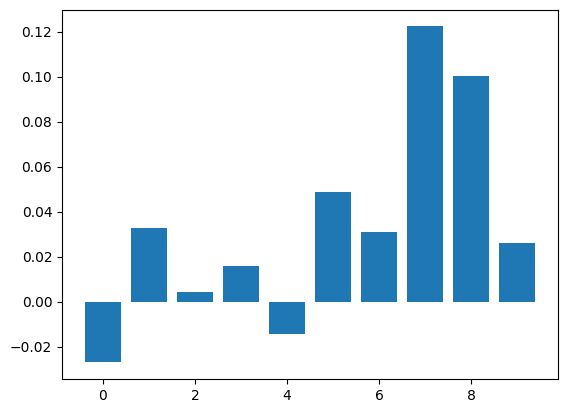

<BarContainer object of 10 artists>

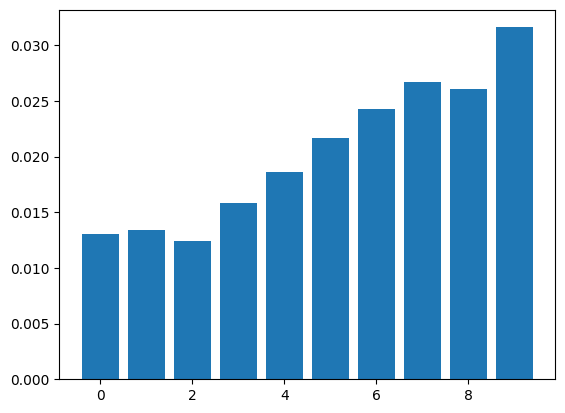

In [132]:
import numpy as np
import  matplotlib.pyplot as plt

next_month_return = ((adjust_price.shift(-30) - adjust_price) / contract_price).rename('next_month_return').dropna()
vol = daily_returns.rolling(30).std().rename('vol').dropna()
next_month_vol = daily_returns.rolling(30).std().shift(-30).rename('next_month_vol').dropna()

df = pd.concat([vol, next_month_return], axis=1).dropna().sort_values('vol')
quantiles = [df['next_month_return'].mean() for df in np.array_split(df, 10)]
plt.bar(range(10), quantiles)
plt.show()

df = pd.concat([vol, next_month_vol], axis=1).dropna().sort_values('vol')
quantiles = [df['next_month_vol'].mean() for df in np.array_split(df, 10)]
plt.bar(range(10), quantiles)

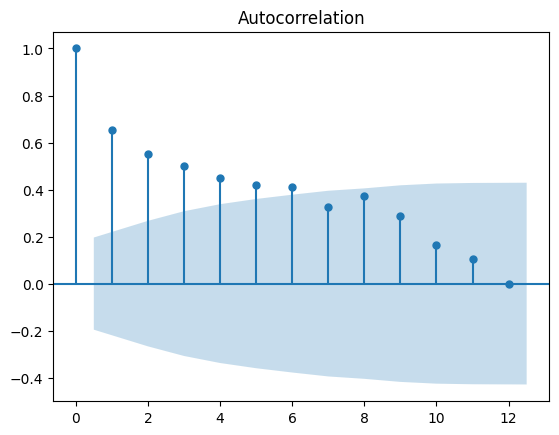

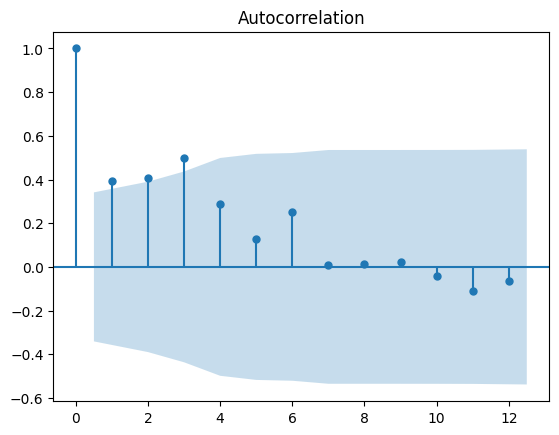

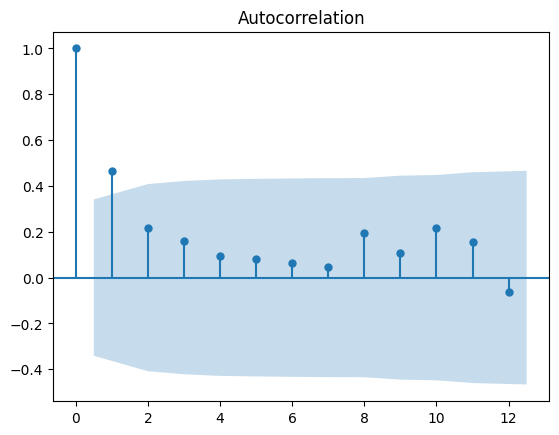

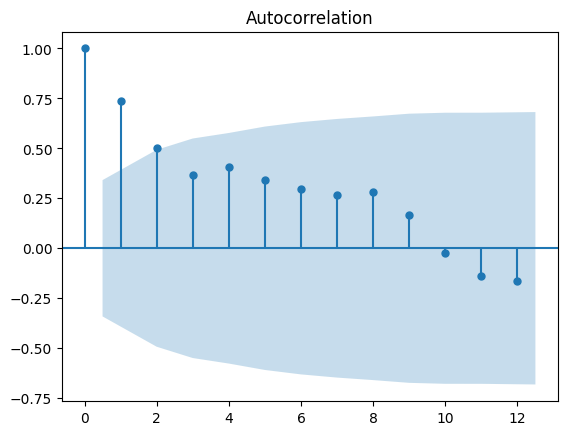

In [133]:
from statsmodels.graphics.tsaplots import plot_acf

month_variance = pd.Series([df.std() for df in np.array_split(daily_returns, len(daily_returns)/21)])
plot_acf(month_variance, lags=12)

for sample in np.array_split(daily_returns, 3):
    month_variance = pd.Series([df.std() for df in np.array_split(sample, len(sample)/21)])
    plot_acf(month_variance, lags=12)

plt.show()

In [146]:
df = []
for ins in data.get_instrument_list():
    df.append(data.daily_prices(ins).rename(ins))

V        AL         A        BU         C        CF  \
index                                                                       
2014-01-02 V        NaN       NaN       NaN       NaN       NaN       NaN   
           AL       NaN       NaN       NaN       NaN       NaN       NaN   
           A        NaN       NaN       NaN       NaN       NaN       NaN   
           BU       NaN       NaN       NaN       NaN       NaN       NaN   
           C        NaN       NaN       NaN       NaN       NaN       NaN   
...                 ...       ...       ...       ...       ...       ...   
2022-08-31 AU  0.886746  0.862140  0.670988  0.654160  0.898769  0.883666   
           Y   0.917230  0.911744  0.709394  0.748541  0.856546  0.869592   
           L   0.914584  0.825896  0.422054  0.789447  0.785822  0.877355   
           TA  0.828578  0.782886  0.479672  0.891658  0.711092  0.801881   
           M   0.526334  0.606789  0.696349  0.516473  0.569006  0.495365   

                     CU         P        PP        EG  ...         J  \
index                                                  ...             
2014-01-02 V        NaN       NaN       NaN       NaN  ...       NaN   
           AL       NaN       NaN       NaN       NaN  ...       NaN   
           A        NaN       NaN       NaN       NaN  ...       NaN   
           BU       NaN       NaN       NaN       NaN  ...       NaN   
           C        NaN       NaN       NaN       NaN  ...       NaN   
...                 ...       ...       ...       ...  ...       ...   
2022-08-31 AU  0.926914  0.891638  0.802389  0.717296  ...  0.843359   
           Y   0.968440  0.957769  0.846991  0.818251  ...  0.896574   
           L   0.835004  0.870540  0.989732  0.937654  ...  0.912716   
           TA  0.810327  0.801087  0.911201  0.864810  ...  0.842133   
           M   0.679624  0.612664  0.488927  0.471844  ...  0.568680   

                     AG        NI        MA        OI        AU         Y  \
index                                                                       
2014-01-02 V        NaN       NaN       NaN       NaN       NaN       NaN   
           AL       NaN       NaN       NaN       NaN       NaN       NaN   
           A        NaN       NaN       NaN       NaN       NaN       NaN   
           BU       NaN       NaN       NaN       NaN       NaN       NaN   
           C        NaN       NaN       NaN       NaN       NaN       NaN   
...                 ...       ...       ...       ...       ...       ...   
2022-08-31 AU  0.946099  0.826449  0.801182  0.872516  1.000000  0.863000   
           Y   0.898201  0.900270  0.917835  0.985168  0.863000  1.000000   
           L   0.815896  0.670861  0.933410  0.827720  0.765287  0.822808   
           TA  0.765230  0.620284  0.919945  0.811103  0.732534  0.822541   
           M   0.559639  0.708418  0.610026  0.722251  0.506597  0.747788   

                      L        TA         M  
index                                        
2014-01-02 V        NaN       NaN       NaN  
           AL       NaN       NaN       NaN  
           A        NaN       NaN       NaN  
           BU       NaN       NaN       NaN  
           C        NaN       NaN       NaN  
...                 ...       ...       ...  
2022-08-31 AU  0.765287  0.732534  0.506597  
           Y   0.822808  0.822541  0.747788  
           L   1.000000  0.916702  0.453302  
           TA  0.916702  1.000000  0.540863  
           M   0.453302  0.540863  1.000000  

[81360 rows x 36 columns]

In [180]:
cor = pd.concat(df, axis=1).rolling(90, min_periods=30).corr(pairwise=True)


ValueError: Length of passed values is 2260, index implies 81360.

<AxesSubplot: >

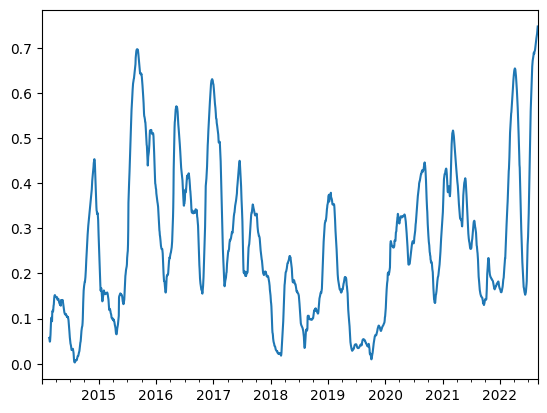

In [216]:
_index = []
mean_corr = []
for index,d in cor.groupby(level=0):
    _index.append(index)
    mean_corr.append(d.where(np.triu(np.ones(d.shape), k=1).astype(bool)).mean().mean())
pd.Series(mean_corr, index=_index).plot()